In [1]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Upload the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/



In [2]:
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 39.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [6]:
# generators (divides whole data into small batches)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [8]:
#Create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation= 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 107ms/step - loss: 1.3123 - accuracy: 0.5606 - val_loss: 0.7178 - val_accuracy: 0.6254
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6556 - accuracy: 0.6120 - val_loss: 0.6670 - val_accuracy: 0.5586
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6174 - accuracy: 0.6569 - val_loss: 0.5575 - val_accuracy: 0.7074
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5509 - accuracy: 0.7066 - val_loss: 0.5236 - val_accuracy: 0.7294
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4759 - accuracy: 0.7599 - val_loss: 0.4566 - val_accuracy: 0.7830
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4063 - accuracy: 0.7980 - val_loss: 0.5596 - val_accuracy: 0.7322
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3689 - accuracy: 0.8209 - val_loss: 0.4570 - val_ac

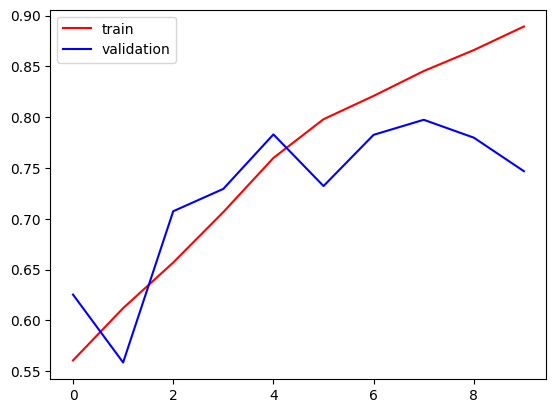

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

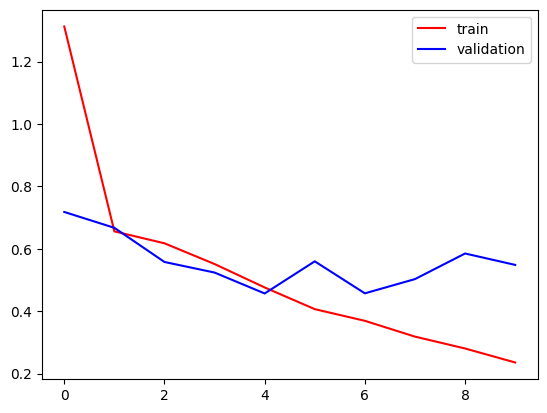

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step


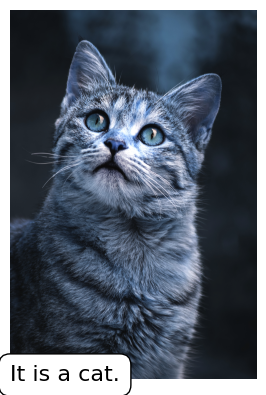

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_img = cv2.imread('/content/cat.jpg')

test_input = cv2.resize(test_img, (256, 256))
test_input = np.expand_dims(test_input, axis=0)  # Add a batch dimension

prediction = model.predict(test_input)

if prediction[0][0] < 0.5:
    label = "It is a cat."
else:
    label = "It is a dog."

plt.imshow(test_img)
plt.axis('off')

# Calculate the position to place the label below the image
label_x = 0
label_y = test_img.shape[0] + 30

# Add a border around the label text
plt.text(label_x, label_y, label, fontsize=16, color='black', backgroundcolor='white',
         bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.show()


1/1 [==============================] - 0s 19ms/step


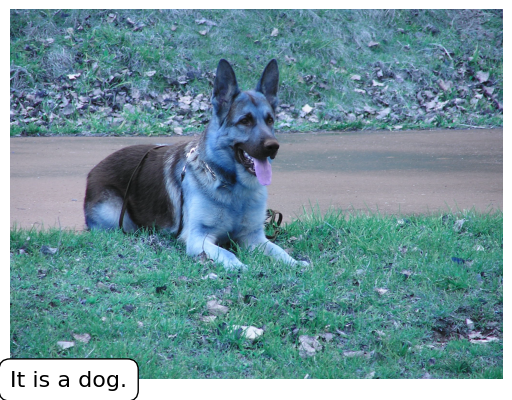

In [27]:
test_img = cv2.imread('/content/dog-1407433.jpg')

test_input = cv2.resize(test_img, (256, 256))
test_input = np.expand_dims(test_input, axis=0)  # Add a batch dimension

prediction = model.predict(test_input)

if prediction[0][0] < 0.5:
    label = "It is a cat."
else:
    label = "It is a dog."

plt.imshow(test_img)
plt.axis('off')

# Calculate the position to place the label below the image
label_x = 0
label_y = test_img.shape[0] + 30

# Add a border around the label text
plt.text(label_x, label_y, label, fontsize=16, color='black', backgroundcolor='white',
         bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.show()
